# Фаза 2 • Неделя 9 • Компьютерное зрение

## Детекция объектов с помощью YOLO

In [ ]:
# !pip install ultralytics
from ultralytics import YOLO

import torch

In [ ]:
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
DEVICE

'cuda'

#### Решаемые задачи YOLO
[Подробнее в документации](https://docs.ultralytics.com/ru/tasks/)

- 🎯 **Обнаружение объектов (Object Detection)**  
  Идентификация и определение местоположения объектов на изображении.

- 🧩 **Сегментация объектов (Object Segmentation)**  
  Обнаружение объектов и определение их границ.

- 🖼 **Классификация изображений (Image Classification)**  
  Классификация изображений по заранее определённым классам.

- 🏃 **Оценка позы (Pose Estimation)**  
  Обнаружение и отслеживание ключевых точек на теле человека.

- 🔄 **Ориентированное обнаружение объектов (Oriented Object Detection, OBB)**  
  Обнаружение объектов с вращением для повышения точности.


#### 1. Простой инференс уже обученной модели для детекции (Object Detection)




In [ ]:
# yolo11n.pt - nano
# yolo11s.pt - small
# yolo11m.pt - medium
# yolo11l.pt - large
# yolo11x.pt - extra large

model = YOLO("yolo11m.pt")

In [ ]:
results = model.predict("https://ultralytics.com/images/bus.jpg", conf=0.5)


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 65.3ms
Speed: 3.0ms preprocess, 65.3ms inference, 285.0ms postprocess per image at shape (1, 3, 640, 480)


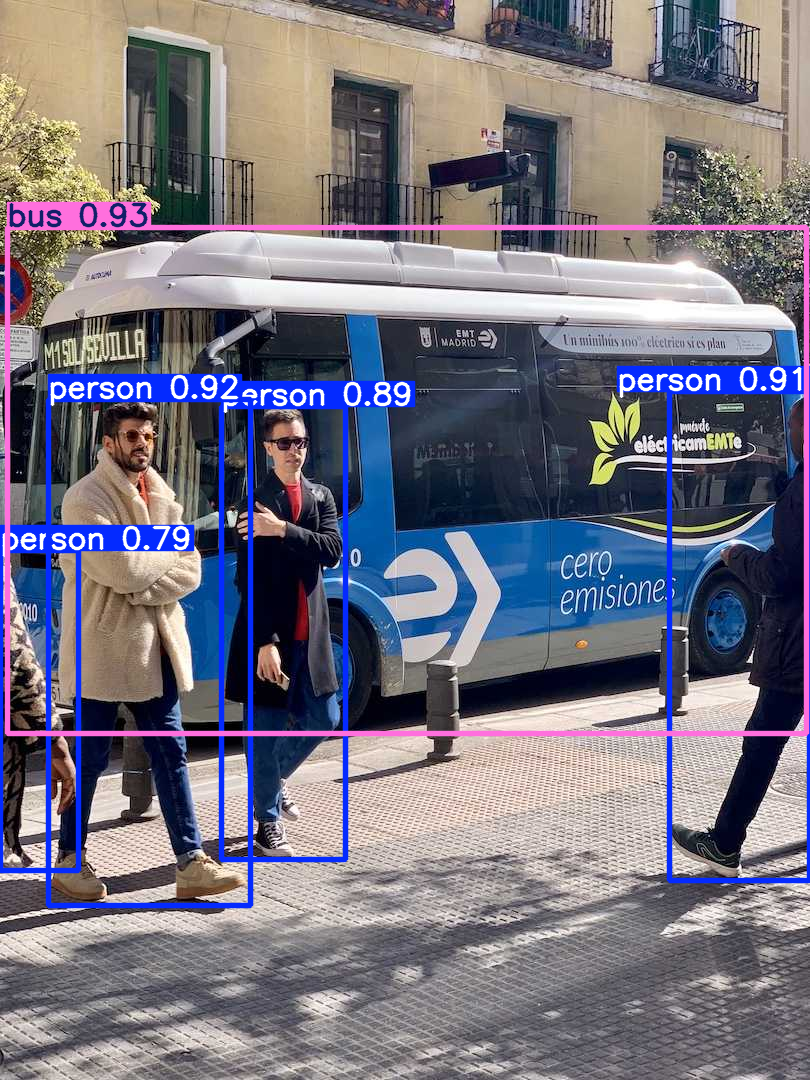

In [ ]:
# Process results list
for result in results:
    boxes = result.boxes  # bbox нужен для детекции
    masks = result.masks  # Маска нужна для сегментации
    keypoints = result.keypoints  # Для определения позы
    probs = result.probs  # Для классификации найденного объекта
    obb = result.obb  # Ориентированный bbox
    result.show()  # display to screen

#### 2. Дообучение yolo11 (fine-tuning)

In [ ]:
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="FbnoX0n8ojtSHiwMn8FJ")
project = rf.workspace("myworkspace-skwwo").project("lion-shswp-dejna-sexno-ey4pt")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
model = YOLO("yolo11m.pt")

In [ ]:
# Train the model
# Здесь можно найти все знакомые нам аргументы обучения(batch_size, epochs, optimizer, и тд)
# https://docs.ultralytics.com/ru/modes/train/#resuming-interrupted-trainings

results = model.train(
    data="/content/Lion-1/data.yaml",
    epochs=30,
    imgsz=640,
    batch=16,
    device=DEVICE
    )

Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=/content/Lion-1/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train35, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxe

train: Scanning /content/Lion-1/train/labels.cache... 210 images, 0 backgrounds, 0 corrupt: 100%|██████████| 210/210 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/Lion-1/valid/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]


Plotting labels to runs/detect/train35/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train35
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      8.87G      2.713      2.867      3.121          6        640: 100%|██████████| 14/14 [00:09<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         60         67      0.215     0.0299     0.0631     0.0174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      8.79G      2.033      2.067      2.423          2        640: 100%|██████████| 14/14 [00:08<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]

                   all         60         67      0.598      0.067       0.18     0.0566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      8.83G      1.754      1.696      2.104          3        640: 100%|██████████| 14/14 [00:08<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         60         67      0.764      0.433      0.525       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      8.86G      1.742      1.442      2.004          3        640: 100%|██████████| 14/14 [00:08<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         60         67      0.724      0.791      0.803      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      8.83G      1.611      1.396      1.955          3        640: 100%|██████████| 14/14 [00:08<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         60         67      0.799      0.627       0.75      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      8.86G      1.594      1.313      1.918          3        640: 100%|██████████| 14/14 [00:07<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         60         67      0.749        0.8      0.807      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      8.82G      1.544      1.237      1.905          5        640: 100%|██████████| 14/14 [00:07<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.76it/s]

                   all         60         67      0.898      0.687      0.872      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      8.85G      1.533      1.247      1.921          3        640: 100%|██████████| 14/14 [00:07<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         60         67      0.801      0.761      0.838      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      8.81G      1.451        1.1      1.796          5        640: 100%|██████████| 14/14 [00:08<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         60         67      0.943      0.896       0.95      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      8.85G      1.435      1.044      1.771          3        640: 100%|██████████| 14/14 [00:07<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.67it/s]

                   all         60         67      0.913      0.784      0.887      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      8.82G      1.409      1.017      1.748          5        640: 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         60         67      0.857      0.791      0.891      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      8.85G      1.444     0.9794      1.744          4        640: 100%|██████████| 14/14 [00:08<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

                   all         60         67       0.84      0.786      0.839      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      8.81G      1.384     0.9587      1.696          2        640: 100%|██████████| 14/14 [00:07<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all         60         67      0.908      0.821      0.884      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      8.85G      1.255     0.8284      1.599          4        640: 100%|██████████| 14/14 [00:08<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

                   all         60         67      0.934      0.844      0.909      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      8.81G      1.238     0.8263      1.579          4        640: 100%|██████████| 14/14 [00:08<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         60         67      0.867      0.851      0.886      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      8.85G      1.235     0.8137      1.595          8        640: 100%|██████████| 14/14 [00:08<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         60         67       0.91      0.821      0.901      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      8.81G      1.246     0.7851      1.564          9        640: 100%|██████████| 14/14 [00:07<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all         60         67      0.951      0.868      0.951      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      8.85G      1.158     0.7618      1.538          5        640: 100%|██████████| 14/14 [00:07<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

                   all         60         67      0.883      0.866      0.915      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      8.81G      1.249     0.8301      1.652          3        640: 100%|██████████| 14/14 [00:08<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

                   all         60         67      0.954      0.921      0.954      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      8.85G      1.146     0.7323       1.51          6        640: 100%|██████████| 14/14 [00:08<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         60         67      0.939      0.918      0.954       0.58


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30       8.8G      1.126     0.6499      1.622          2        640: 100%|██████████| 14/14 [00:08<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         60         67      0.939      0.915      0.957      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      8.84G      1.076     0.6089      1.559          2        640: 100%|██████████| 14/14 [00:07<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all         60         67      0.959      0.881      0.956      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30       8.8G      1.023     0.5434      1.503          2        640: 100%|██████████| 14/14 [00:07<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

                   all         60         67      0.949       0.94      0.967      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      8.85G      1.005     0.5109      1.481          2        640: 100%|██████████| 14/14 [00:08<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all         60         67      0.963       0.94      0.964      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30       8.8G     0.9889     0.5147      1.473          4        640: 100%|██████████| 14/14 [00:08<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         60         67      0.967       0.91      0.957      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      8.86G      1.003     0.5115      1.502          3        640: 100%|██████████| 14/14 [00:07<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

                   all         60         67      0.968      0.925      0.955      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30       8.8G     0.9914     0.5032       1.47          2        640: 100%|██████████| 14/14 [00:07<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

                   all         60         67       0.96       0.91      0.956      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      8.85G     0.9205     0.4664      1.437          2        640: 100%|██████████| 14/14 [00:08<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all         60         67      0.943       0.91      0.949      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30       8.8G      0.948      0.457      1.422          2        640: 100%|██████████| 14/14 [00:07<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all         60         67      0.962      0.925      0.952      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      8.86G     0.8636      0.442      1.347          2        640: 100%|██████████| 14/14 [00:07<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         60         67      0.965      0.925      0.958      0.626



30 epochs completed in 0.115 hours.
Optimizer stripped from runs/detect/train35/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/train35/weights/best.pt, 40.5MB

Validating runs/detect/train35/weights/best.pt...
Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 303 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]


                   all         60         67      0.948       0.94      0.967      0.634
Speed: 0.2ms preprocess, 13.1ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/train35


#### 3. Инференс(предсказание) дообученной модели

In [ ]:
url = "https://mg.co.za/wp-content/uploads/2023/08/gettyimages-1445406232-594x594-1.jpg"

results = model.predict(url, conf=0.6)


Found https://mg.co.za/wp-content/uploads/2023/08/gettyimages-1445406232-594x594-1.jpg locally at gettyimages-1445406232-594x594-1.jpg
image 1/1 /content/gettyimages-1445406232-594x594-1.jpg: 448x640 1 Lion, 78.7ms
Speed: 5.2ms preprocess, 78.7ms inference, 11.3ms postprocess per image at shape (1, 3, 448, 640)


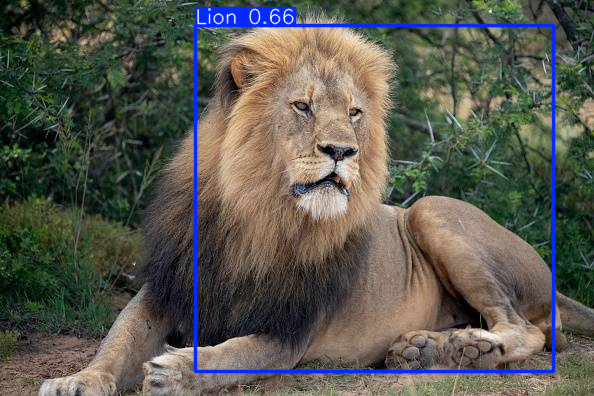

In [ ]:
# Process results list
for result in results:
    boxes = result.boxes  # bbox нужен для детекции
    masks = result.masks  # Маска нужна для сегментации
    keypoints = result.keypoints  # Для определения позы
    probs = result.probs  # Для классификации найденного объекта
    obb = result.obb  # Ориентированный bbox
    result.show()  # display to screen

#### 4. Бонус. Инференс(предсказание) видео

In [ ]:
# выгрузим тестово одно видео

!wget https://huggingface.co/datasets/Textovic/lions_video/resolve/main/video1.mp4 -O video1.mp4

--2025-02-10 21:06:16--  https://huggingface.co/datasets/Textovic/lions_video/resolve/main/video1.mp4
Resolving huggingface.co (huggingface.co)... 18.164.174.118, 18.164.174.17, 18.164.174.23, ...
Connecting to huggingface.co (huggingface.co)|18.164.174.118|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs-us-1.hf.co/repos/c9/72/c972ab72a73289c19f65401c6c020e35be7eb87aae505b4aefe9179d252bc8e7/5e98701dc466843f43dd71e3ec28224aa32c6ba256ea3e46a060048c80866002?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27video1.mp4%3B+filename%3D%22video1.mp4%22%3B&response-content-type=video%2Fmp4&Expires=1739225176&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTczOTIyNTE3Nn19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy11cy0xLmhmLmNvL3JlcG9zL2M5LzcyL2M5NzJhYjcyYTczMjg5YzE5ZjY1NDAxYzZjMDIwZTM1YmU3ZWI4N2FhZTUwNWI0YWVmZTkxNzlkMjUyYmM4ZTcvNWU5ODcwMWRjNDY2ODQzZjQzZGQ3MWUzZWMyODIyNGFhMzJjNmJhMjU2ZWEzZTQ2YTA2MDA0OGM

In [ ]:
model(
    "/content/video1.mp4",
    save=True,
    conf=0.6,
    vid_stride=5
    )



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/1124) /content/video1.mp4: 384x640 (no detections), 65.0ms
video 1/1 (frame 2/1124) /content/video1.mp4: 384x640 (no detections), 39.4ms
video 1/1 (frame 3/1124) /content/video1.mp4: 384x640 (no detections), 33.2ms
video 1/1 (frame 4/1124) /content/video1.mp4: 384x640 (no detections), 29.4ms
video 1/1 (frame 5/1124) /content/video1.mp4: 384x640 (no detections), 41.7ms
video 1/1 (frame 6/1124) /content/video1.mp4: 384x640 (no detectio

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Lion'}
 obb: None
 orig_img: array([[[236, 232, 228],
         [236, 232, 228],
         [236, 232, 228],
         ...,
         [165, 177, 187],
         [158, 180, 188],
         [158, 180, 188]],
 
        [[236, 232, 228],
         [236, 232, 228],
         [236, 232, 228],
         ...,
         [165, 177, 187],
         [158, 180, 188],
         [158, 180, 188]],
 
        [[236, 232, 228],
         [236, 232, 228],
         [236, 232, 228],
         ...,
         [165, 177, 187],
         [158, 180, 188],
         [158, 180, 188]],
 
        ...,
 
        [[206, 203, 204],
         [206, 203, 204],
         [208, 205, 206],
         ...,
         [148, 160, 170],
         [148, 160, 170],
         [149, 161, 171]],
 
        [[210, 202, 204],
         [210, 202, 204],
         [212, 204, 206],
         ...,
         [148, 160, 

In [ ]:
model.export